# Analyze A/B Test Results
This project will assure you have mastered the subjects covered in the statistics lessons. The hope is to have this project be as comprehensive of these topics as possible. Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)

# Introduction
A/B tests are very commonly performed by data analysts and data scientists. It is important that you get some practice working with the difficulties of these

For this project, you will be working to understand the results of an A/B test run by an e-commerce website. Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

# Part I - Probability
To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#Setting the seed to assure that we get the same answers on quizzes as we set up
random.seed(42)

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#Read csv
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#Find the number of rows
print("rows in dataset is -", df.shape[0])

rows in dataset is - 294478


c. The number of unique users in the dataset.

In [4]:
#Unique user ids
print("unique users in the dataset -", df.user_id.nunique())

unique users in the dataset - 290584


d. The proportion of users converted.

In [5]:
print("Converted Users", (df.query('converted == 1')['user_id'].nunique()/df.user_id.count())*100)

Converted Users 11.94418598333322


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#Counting the number of lines where new_page and control are aligned, also old page and treatment, and add them up
df.query('landing_page == "new_page" and group == "control"').count()[0] + df.query('landing_page == "old_page" and group == "treatment"').count()[0]

3893

f. Do any of the rows have missing values?

In [7]:
#Searching for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Now we copying the dataframe
df2=df

In [9]:
# dataframe where where treatment is not aligned with new_page or control is not aligned with old_page 
df2 = df[((df.group=='treatment') & (df.landing_page=='new_page')) | ((df.group=='control') & (df.landing_page=='old_page'))]

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
#Number of users which are unique
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
#Find the duplicate id
df2[df2.user_id.duplicated()==True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

repeated user_id of 773192 corresponds to treatment group and it was introduced to the new landing page after which he didn't convert as a new customer. 

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop(df2[df2.user_id.duplicated()].index, inplace=True)

C:\Users\NEIL NAHAR\Anaconda3.x\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# Probability of an individual converting regardless of the page they receive
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
#Probability of a user converted in control group is
df2[df2['group'] == "control"]['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
print("probability they converted is", 
        (df2.query('group=="treatment" and converted=="1"').user_id.count() / df2.shape[0]) / 
              (df2.query('group=="treatment"').user_id.count() / df2.shape[0]))

probability they converted is 0.11880806551510564


d. What is the probability that an individual received the new page?

In [17]:
print("Probability for individual that received the new page is",
        df2[df2['landing_page'] == 'new_page'].user_id.count() / df2.shape[0])

Probability for individual that received the new page is 0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer** The Probability in control group - 0.1203863045004612. The Probability in treatment group - 0.11880724790277405. It is clearly shown that according to the current analysis, the difference between conversion probability between new and old page is not that significant to conclude that new treatment page led to more conversions.Therefore further analysis is required.

# <a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} - p_{old} < = 0$$

$$H_1: p_{new} - p_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
s_new = df2['converted'].mean()
print("Convert rate", s_new)

Convert rate 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
s_old = df2['converted'].mean()
print("Convert rate", s_old)

Convert rate 0.11959708724499628


c. What is $n_{new}$?

In [20]:
n_new = df2[df2.landing_page == 'new_page'].shape[0]
print(n_new)

145310


d. What is $n_{old}$?

In [21]:
n_old = df2[df2.landing_page == 'old_page'].shape[0]
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.choice([1, 0], size = n_new, replace=True, p = [s_new, 1-s_new])
print("Simulated Transactions", new_page_converted)

Simulated Transactions [0 0 0 ... 0 1 0]


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice([1, 0], size = n_old, replace=True, p = [s_old, 1-s_old])
print("Simulated Transactions", old_page_converted)

Simulated Transactions [0 0 0 ... 0 0 0]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
new_page_converted.mean() - old_page_converted.mean()

0.0016840988092973047

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
p_diffs = []
#Applying the bootstrap sampling method
for _ in range(10000):
    new_page_converted = np.random.binomial(1,s_new,n_new)
    old_page_converted = np.random.binomial(1,s_old,n_old)
    difference = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(difference)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

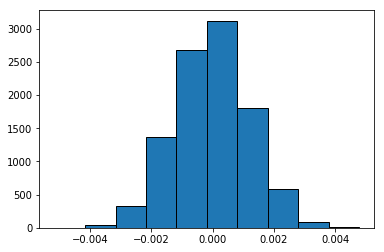

In [26]:
plt.hist(p_diffs, bins = 10, edgecolor='k')
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

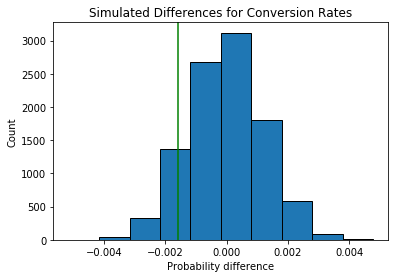

In [27]:
obs_diffs = (df2[df2.group == 'treatment'].converted.mean()    
            - df2[df2.group == 'control'].converted.mean())

plt.hist(p_diffs, bins = 10, edgecolor='k')
plt.axvline(obs_diffs, c='green')
plt.title("Simulated Differences for Conversion Rates")
plt.xlabel("Probability difference") # x-label
plt.ylabel("Count") # y-label
plt.show()

In [28]:
#Converting it to numpy array and then evaluating the p-value
print("Proportion is")
p_diffs = np.array(p_diffs)
(p_diffs > obs_diffs).mean()

Proportion is


0.9004

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer The value which is calculated above is reffered to the p-value. It is the confirmation for rejecting the null hypothesis. So a very large p-value indicates weak evidence against the null hypothesis. It can be obserrved that population in the sample is above the Observed difference which points to the fact that the new page is not doing significantly bettter than the old page. The smaller the p-value, the stronger the evidence that the null hypothesis should be rejected. Since p-value is so large, we cannot reject the null hypothesis and conclude that the old page is almost at par and probably slightly better than the new page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

conv_old = sum(df2.query('group == "control"')['converted'])
conv_new = df2.query('group == "treatment"').converted.sum()
n_old = len(df2.query('landing_page=="old_page"'))
n_new = df2.query("landing_page == 'new_page'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [30]:
z_score, p_value = sm.stats.proportions_ztest([conv_old, conv_new], [n_old, n_new], alternative='smaller')
#for z-score
print("z-score =", z_score)
#for p-value
print("p-value =", p_value)

z-score = 1.3109241984234394
p-value = 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [31]:
from scipy.stats import norm
print(norm.cdf(z_score))
print(norm.ppf(1-(0.05)))

0.9050583127590245
1.6448536269514722


**The z-score of 0.9050583127590245 is less than the critical value of 1.644853 on a 95 percent confidence interval hence we conclude that we do not have sufficient evidence to reject the null hypothesis. we fail to reject the null hypothesis. Moreover, p-value is nearly similar to the result from our earlier findings in j. and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression is used**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
#Create intercept column
df2['intercept'] = 1
#Create dummies
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2.head()

C:\Users\NEIL NAHAR\Anaconda3.x\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\NEIL NAHAR\Anaconda3.x\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [33]:
import statsmodels.api as sm
demo = sm.Logit(df2['converted'], df2[['ab_page', 'intercept']])
out = demo.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
out.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 03 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        01:21:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

**Logistic regression**

$$H_0: p_{new} - p_{old} = 0$$
$$H_1: p_{new} - p_{old} != 0$$

**In Part 2**
$$H_0: p_{new} - p_{old} <= 0$$
$$H_1: p_{new} - p_{old} > 0$$

The p-value calculated here is 0.190. p-value associated with ab_page column is lower than the p-value calculated using the z-score function. It is due to the intercept added.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**We should add extra factors to the regression models as they may also affect the conversions. The drawback is that we don't know that how the other factor will influence the result in which direction. As our extra factor may change every time on.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [35]:
#Reading the csv file
country = pd.read_csv('countries.csv')
country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [36]:
#Inner join two data
df_new = country.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [37]:
#for initial rows
df_new.head()
#Create dummies
df_new[['ab_US', 'ab_UK']] = pd.get_dummies(df_new.country)[['US', 'UK']]
demo = sm.Logit(df_new['converted'], df_new[['ab_US', 'ab_UK', 'intercept']])
out = demo.fit()
print("\n\tImpacts of country on the conversions\n")
out.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6

	Impacts of country on the conversions



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 03 Jun 2020   Pseudo R-squ.:               1.521e-05
Time:                        01:21:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_US          0.0408      0.027      1.518      0.129      -0.012       0.093
ab_UK          0.0507      0.028      1.786      0.074      -0.005       0.106
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [38]:
#for initial rows
df_new.head()
df_new['ab_UK_page'] = df_new['ab_page'] * df_new['ab_UK']
df_new['ab_US_page'] = df_new['ab_page'] * df_new['ab_US']
df_new.head()
demo = sm.Logit(df_new.converted, df_new[['ab_US', 'ab_UK', 'ab_US_page', 'ab_UK_page', 'intercept']])
out = demo.fit()
#summary result
out.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Wed, 03 Jun 2020   Pseudo R-squ.:               2.691e-05
Time:                        01:21:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.2205
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_US          0.0511      0.028      1.841      0.066      -0.003       0.105
ab_UK          0.0453      0.031      1.481      0.139      -0.015       0.105
ab_US_page    -0.0206      0.014     -1.505      0.132      -0.047       0.006
ab_UK_page     0.0108      0.023      0.475      0.635      -0.034       0.056
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
==============================================================================
"""

In [39]:
df_new.groupby('group').mean()['converted']

group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64

<a id='conclusions'></a>
## Conclusions

The conclusion for the above work is that we do not have enough evidence to suggest that the new page results in more conversions than the old one. As According to the analysis performed above I found that the old page was significantly better than the new page, therefore I fail to reject the null hypothesis. Based on the results of Logistic Regression, none of the variables have significant p-values. Therefore, we will fail to reject the null hypothesis and conclude that we do not have sufficient evidence that suggests that there is an influence of country and page received on user conversions.

### Resources
- Udacity Nanodegree Videos and Resources
- https://www.statisticssolutions.com/what-is-logistic-regression/